In [390]:
import pandas as pd
import numpy as np

In [391]:
df = pd.read_csv("C:/Users/usman.bashir/Desktop/Python Prac/Adidas US Sales Datasets.csv", header=1, parse_dates = ['Invoice Date'])

In [392]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


Data Cleaning

In [393]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [394]:
print("Are there any duplicates in our dataset?", df.duplicated().any())

Are there any duplicates in our dataset? False


In [395]:
df.dtypes

Retailer                    object
Retailer ID                  int64
Invoice Date        datetime64[ns]
Region                      object
State                       object
City                        object
Product                     object
Price per Unit              object
Units Sold                  object
Total Sales                 object
Operating Profit            object
Operating Margin            object
Sales Method                object
dtype: object

Converting the Operating profit, Price per unit, Units sold, Total Sales, Operating Margin into the correct data type

In [396]:
df['Price per Unit'] = df['Price per Unit'].str[1:]

In [397]:
df['Price per Unit'] = df['Price per Unit'].astype(float)

In [398]:
df['Price per Unit'].head(1)

0    50.0
Name: Price per Unit, dtype: float64

In [399]:
df['Units Sold'] = df['Units Sold'].str.replace(",","",regex = True)

In [400]:
df['Units Sold'] = df['Units Sold'].astype(int)

In [401]:
df['Units Sold'].head(1)

0    1200
Name: Units Sold, dtype: int32

In [402]:
df['Total Sales'] = df['Total Sales'].str[1:]

In [403]:
df['Total Sales'] = df['Total Sales'].str.replace(",","",regex = True)

In [404]:
df['Total Sales'] = df['Total Sales'].astype(int)

In [405]:
df['Total Sales'].head(1)

0    600000
Name: Total Sales, dtype: int32

In [406]:
df['Operating Profit'] = df['Operating Profit'].str[1:]

In [407]:
df['Operating Profit'] = df['Operating Profit'].str.replace(",","",regex = True)

In [408]:
df['Operating Profit'] = df['Operating Profit'].astype(int)

In [409]:
df['Operating Profit'].head(1)

0    300000
Name: Operating Profit, dtype: int32

In [410]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30%,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35%,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35%,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30%,In-store


Which product category had the highest average operating profit margin across all sales methods?

In [411]:
df.groupby('Product')['Operating Profit'].sum().sort_values(ascending = False).head(1)

Product
Men's Street Footwear    82802323
Name: Operating Profit, dtype: int32

In [412]:
print("Men's Street Footwear had the highest average operating profit margin across all sales methods.")

Men's Street Footwear had the highest average operating profit margin across all sales methods.


How does the total sales revenue differ between in-store and outlet sales methods for each product category?

In [413]:
data1 = df[df['Sales Method'].isin(["In-store", "Outlet"])]

In [414]:
import seaborn as sns
import matplotlib.pyplot as plt

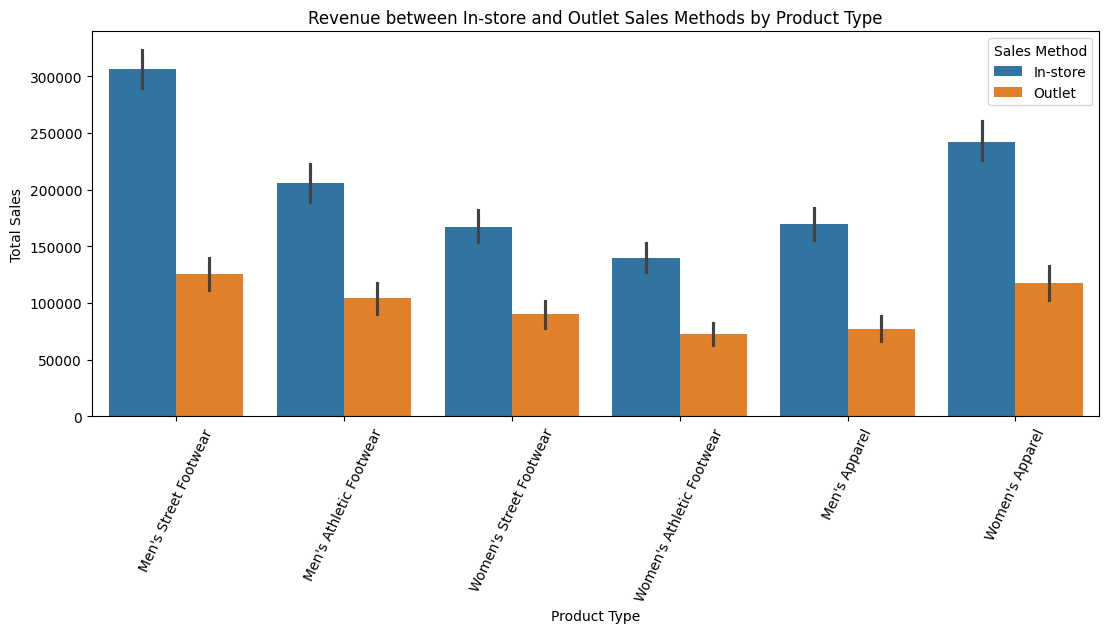

In [415]:
plt.figure(figsize = (13,5))
sns.barplot(data = data1, x = "Product", y = "Total Sales", hue = 'Sales Method')
plt.xticks(rotation = 65)
plt.xlabel("Product Type")
plt.title("Revenue between In-store and Outlet Sales Methods by Product Type")
plt.show()

What is the trend in total sales revenue over the three-month period from January to March 2020?

In [416]:
df['Month'] = df['Invoice Date'].dt.month

In [417]:
import calendar

In [418]:
list = []
for month in df['Month']:
    list.append(calendar.month_name[month])

In [419]:
df['Month Name'] = list

In [420]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Month Name
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,1,January


In [421]:
df['Year'] = df['Invoice Date'].dt.year

In [422]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Month Name,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,1,January,2020


In [423]:
data2 = df.sort_values(by = ['Year', 'Month'])

In [424]:
data2 = data2[(data2['Month'].isin([1,2,3])) & (data2['Year'] == 2020)][['Month Name', 'Total Sales']]

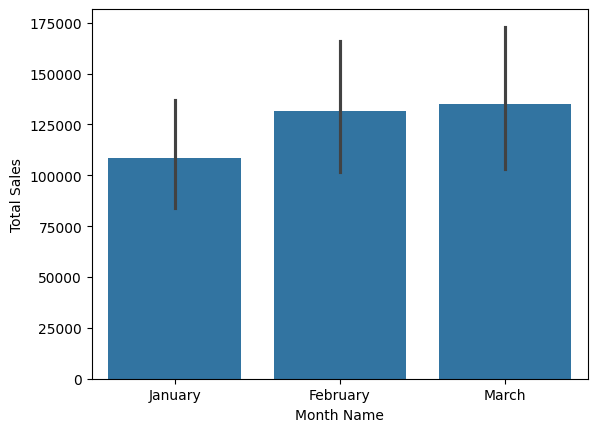

In [425]:
sns.barplot(x = 'Month Name', y = 'Total Sales', data =data2)
plt.show()

Which city within the Northeast region had the highest total sales revenue for Foot Locker in the dataset?

In [426]:
df.head(2)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Month Name,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,1,January,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30%,In-store,1,January,2020


In [427]:
df[(df['Region'] == "Northeast") & (df['Retailer'] == 'Foot Locker')].groupby('City')['Total Sales'].sum().sort_values(ascending = False).head(1)

City
New York    25008568
Name: Total Sales, dtype: int32

Newyork is the city within the Northeast region which had the highest total sales revenue for Foot Locker in the dataset

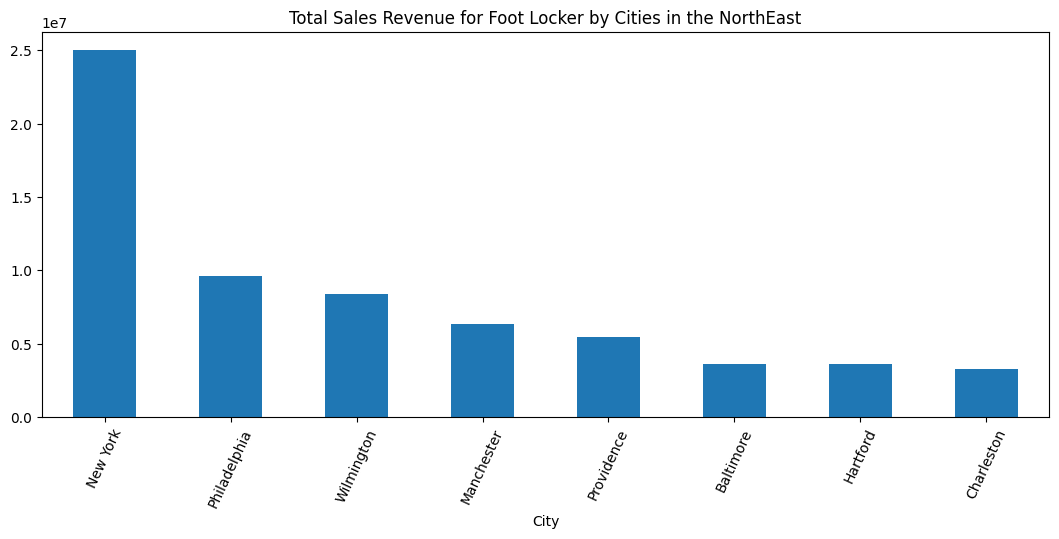

In [428]:
plt.figure(figsize = (13,5))
df[(df['Region'] == "Northeast") & (df['Retailer'] == 'Foot Locker')].groupby('City')['Total Sales'].sum().sort_values(ascending = False).plot(\
kind = 'bar')
plt.xticks(rotation = 65)
plt.title("Total Sales Revenue for Foot Locker by Cities in the NorthEast")
plt.show()

What is the average price per unit for each product category?

In [429]:
df.groupby("Product")["Price per Unit"].mean().round(2)

Product
Men's Apparel                50.32
Men's Athletic Footwear      43.78
Men's Street Footwear        44.24
Women's Apparel              51.60
Women's Athletic Footwear    41.11
Women's Street Footwear      40.25
Name: Price per Unit, dtype: float64

How does the average price per unit vary between different regions?

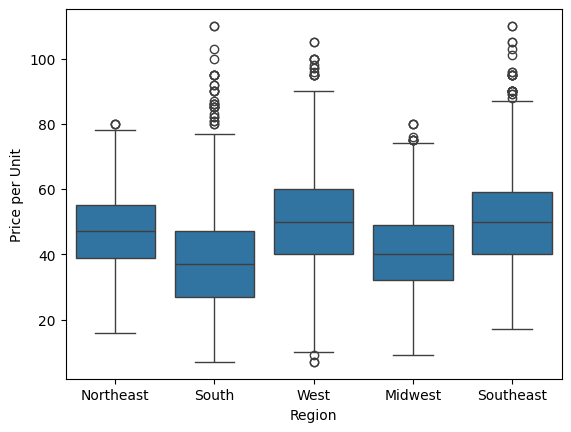

In [430]:
sns.boxplot(x = 'Region', y = "Price per Unit", data =df)
plt.show()

Is there a correlation between the price per unit and the total sales revenue?

In [431]:
df[['Price per Unit','Total Sales']].corr()

,Price per Unit,Total Sales
Price per Unit,1.000000,0.435811
Total Sales,0.435811,1.000000


The correlation between price per unit and the total sales revenue is weak but positive.

Is there a relationship between the number of units sold and the operating profit margin?

In [432]:
df.head(1)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Month Name,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store,1,January,2020


<Axes: xlabel='Units Sold', ylabel='Operating Profit'>

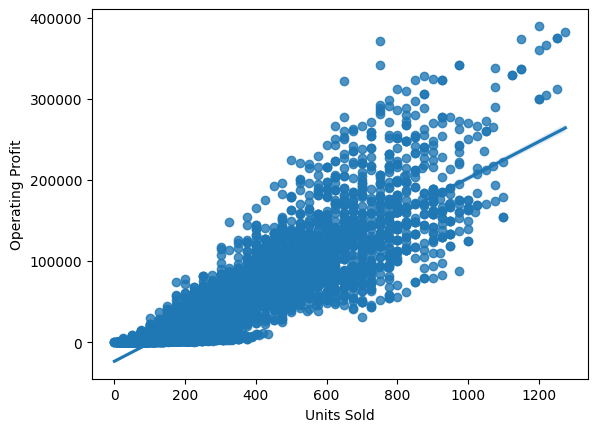

In [433]:
sns.regplot(x = 'Units Sold', y ='Operating Profit', data =df)

The regression plot shows that there is a strong positive relation between the units sold and the operating profit.

<Axes: xlabel='Units Sold', ylabel='Operating Profit'>

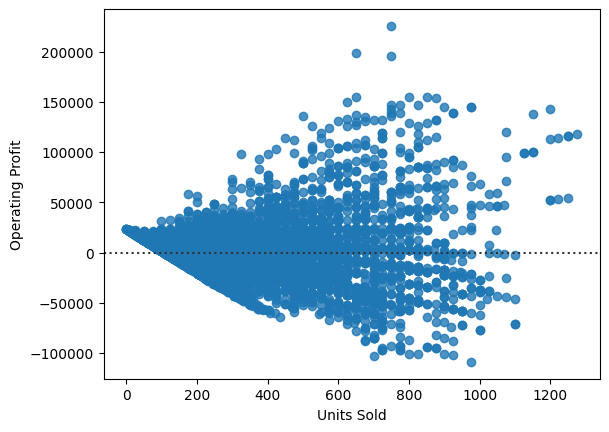

In [434]:
sns.residplot(x = 'Units Sold', y ='Operating Profit', data =df)

Constructing various Regression Models to see which best fits the relationship between Units Sold and the Operating Profit

In [435]:
from sklearn.linear_model import LinearRegression

In [436]:
lm = LinearRegression()

In [437]:
X = df[['Units Sold']]
y = df['Operating Profit']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [438]:
lm.fit(x_train,y_train)

LinearRegression()

In [439]:
y_hat = lm.predict(x_test)

In [440]:
inte = lm.intercept_

In [441]:
coef = lm.coef_[0]

In [442]:
print(f"Operating Profit = {coef}*Units Sold {inte}")

Operating Profit = 224.9285176709013*Units Sold -23320.938681894157


According to this Linear Regression Model, Operating Profit and Units sold are related by the equation above

Checking the Accuracy of the Model

In [443]:
from sklearn.metrics import mean_squared_error

In [444]:
r_square1= lm.score(x_test,y_test).round(2)

In [445]:
print("The R Square is", r_square1)

The R Square is 0.8


In [446]:
mse1 = mean_squared_error(y_test,y_hat).round(2)

In [447]:
print("The Mean Squared Error is", mse1)

The Mean Squared Error is 570784670.99


Carrying out a Multi Linear Regression between [Units Sold and Total Sales] with the Operating Profit

In [448]:
lm2  = LinearRegression()

In [449]:
X = df[['Units Sold','Total Sales']]
y = df['Operating Profit']

In [450]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state =1)

In [451]:
lm2.fit(x_train,y_train)

LinearRegression()

Checking the Accuracy of the Model

In [452]:
r_square2 = lm2.score(x_test, y_test).round(2)
print("The R Square is", r_square2)

The R Square is 0.92


In [453]:
y_hat2 = lm2.predict(x_test)

In [454]:
from sklearn.metrics import mean_squared_error
mse2 = mean_squared_error(y_test,y_hat2).round(2)
print("The Mean Squared Error is",mse2)

The Mean Squared Error is 244565220.67


In [455]:
inter = lm2.intercept_.round(2)

In [456]:
coef1, coef2 = lm2.coef_.round(2)

In [457]:
print(f"Operating Profit = {coef1}*Units Sold + {coef2}* Total Sales {inter}")

Operating Profit = 27.69*Units Sold + 0.33* Total Sales -3121.79


 According to this Linear Regression Model, Operating Profit is related to the Units sold and Total Sales by the equation above

C:\Users\usman.bashir\AppData\Local\Temp\ipykernel_16348\2106114878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Value')
C:\Users\usman.bashir\AppData\Local\Temp\ipykernel_16348\2106114878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

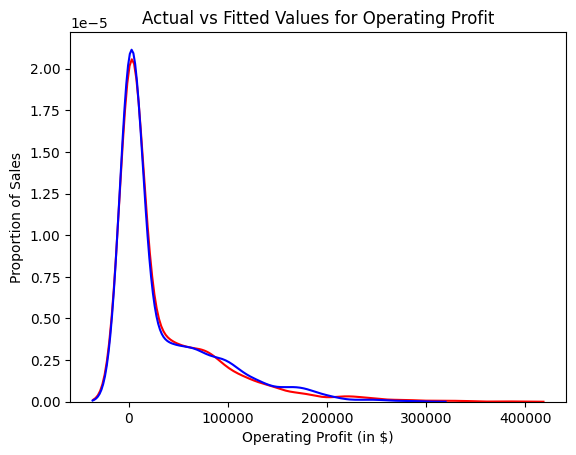

In [458]:
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'Actual Value')
sns.distplot(y_hat2, hist = False, color = 'blue', label = 'Fitted Values', ax = ax1)
plt.ylabel("Proportion of Sales")
plt.xlabel("Operating Profit (in $)")
plt.title("Actual vs Fitted Values for Operating Profit")
plt.show()

We can see that the fitted values are extremely close to the actual values so this multi linear regression model is a great fit
for predicting Operating Profit values.

Carrying out Polynomial Regression

In [459]:
x = df[['Units Sold']]
y = df['Operating Profit']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

Finding out which Polynomial Order results in the highest r-square value and reduces Overfitting

In [460]:
from sklearn.preprocessing import PolynomialFeatures
lr3 = LinearRegression()

In [461]:
order = np.arange(1,11,1)
r_square_list = []
mean_error_list = []
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lr3.fit(x_train_pr, y_train)
    y_hat = lr3.predict(x_test_pr)
    r_square_list.append(lr3.score(x_test_pr, y_test).round(3))
    mean_error_list.append(mean_squared_error(y_test,y_hat).round(2))

In [462]:
print(r_square_list)

[0.805, 0.817, 0.82, 0.827, 0.826, 0.826, 0.825, 0.821, 0.806, 0.779]


In [463]:
print(mean_error_list)

[570784670.99, 534512056.9, 527340340.95, 506326786.81, 508655503.31, 508503571.93, 510229138.37, 521775324.7, 566972933.91, 646962762.33]


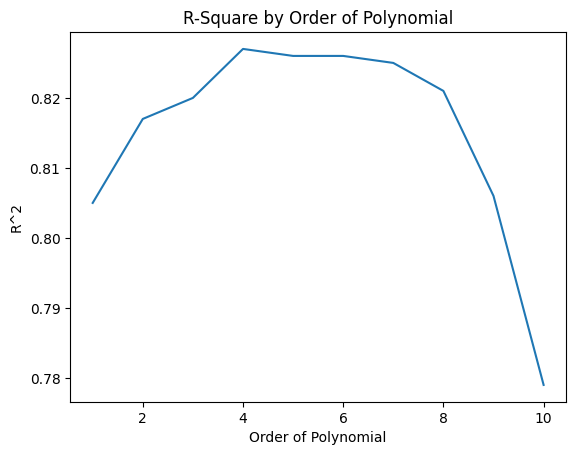

In [464]:
plt.plot(order, r_square_list)
plt.xlabel("Order of Polynomial")
plt.ylabel("R^2")
plt.title("R-Square by Order of Polynomial")
plt.show()

In [465]:
r_square3 = max(r_square_list)

In [466]:
r_square3

0.827

In [467]:
mse3 = mean_error_list[3]

In [468]:
mse3

506326786.81

In [469]:
print(f"The r_square for the Simple Linear Regreesion model is {r_square1}, for the Multi Linear Regression Model it is \
{r_square2} and for the Polynomial Regression Model it is {r_square3}.")

The r_square for the Simple Linear Regreesion model is 0.8, for the Multi Linear Regression Model it is 0.92 and for the Polynomial Regression Model it is 0.827.


In [470]:
print(f"The Mean Squared Error for the Simple Linear Regreesion model is {mse1}, for the Multi Linear Regression Model it is \
{mse2} and for the Polynomial Regression Model it is {mse3}.")

The Mean Squared Error for the Simple Linear Regreesion model is 570784670.99, for the Multi Linear Regression Model it is 244565220.67 and for the Polynomial Regression Model it is 506326786.81.


In [471]:
print("These metrics show that the Multi Linear Regression model is the best fit in this case as it has the highest R square and the \
lowest mean squared error.")

These metrics show that the Multi Linear Regression model is the best fit in this case as it has the highest R square and the lowest mean squared error.
